In [60]:
# importing neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from IPython.display import Image
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

import os
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [61]:
#to load dataset
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
store_df = pd.read_csv("../data/store.csv") 

C:\Users\mo\AppData\Local\Temp\ipykernel_13928\3530557005.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("../data/train.csv")


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [63]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [65]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.000,1,0,0
1,2,3,4,2015-09-17,1.000,1,0,0
2,3,7,4,2015-09-17,1.000,1,0,0
3,4,8,4,2015-09-17,1.000,1,0,0
4,5,9,4,2015-09-17,1.000,1,0,0


In [66]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [67]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [68]:
train_df.shape,test_df.shape, store_df.shape

((1017209, 9), (41088, 8), (1115, 10))

In [69]:
train_df = pd.merge(train_df, store_df, how = 'left', on = 'Store')
test_df = pd.merge(test_df, store_df, how = 'left', on = 'Store')

In [70]:
#data types and shape of data features in the dataset after merged with store
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [71]:
# dispaling trainig data after merged with store data
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.000,9.000,2009.000,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.000,4.000,2015.000,0,NaN,NaN,NaN


In [72]:
# data types and shape of data features in the dataset after merged with store
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [73]:

test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.000,1,0,0,c,a,1270.000,9.000,2008.000,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.000,1,0,0,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.000,1,0,0,a,c,24000.000,4.000,2013.000,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.000,1,0,0,a,a,7520.000,10.000,2014.000,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.000,1,0,0,a,c,2030.000,8.000,2000.000,0,NaN,NaN,NaN


In [74]:
# let to remove id from test dataset
ID=test_df['Id']
test_df.drop('Id',inplace=True, axis=1)

In [75]:
# describing the datset 
test_df.describe()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000,41088.000,41077.000,41088.000,41088.000,40992.000,25872.000,25872.000,41088.000,23856.000,23856.000
mean,555.900,3.979,0.854,0.396,0.443,5088.583,7.035,2008.642,0.581,24.427,2011.821
std,320.274,2.015,0.353,0.489,0.497,7225.487,3.143,6.862,0.493,14.161,1.692
min,1.000,1.000,0.000,0.000,0.000,20.000,1.000,1900.000,0.000,1.000,2009.000
25%,279.750,2.000,1.000,0.000,0.000,720.000,4.000,2006.000,0.000,13.000,2011.000
50%,553.500,4.000,1.000,0.000,0.000,2425.000,7.000,2010.000,1.000,22.000,2012.000
75%,832.250,6.000,1.000,1.000,1.000,6480.000,9.000,2012.000,1.000,37.000,2013.000
max,1115.000,7.000,1.000,1.000,1.000,75860.000,12.000,2015.000,1.000,49.000,2015.000


In [76]:
#view null values count
test_df.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [77]:
train_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

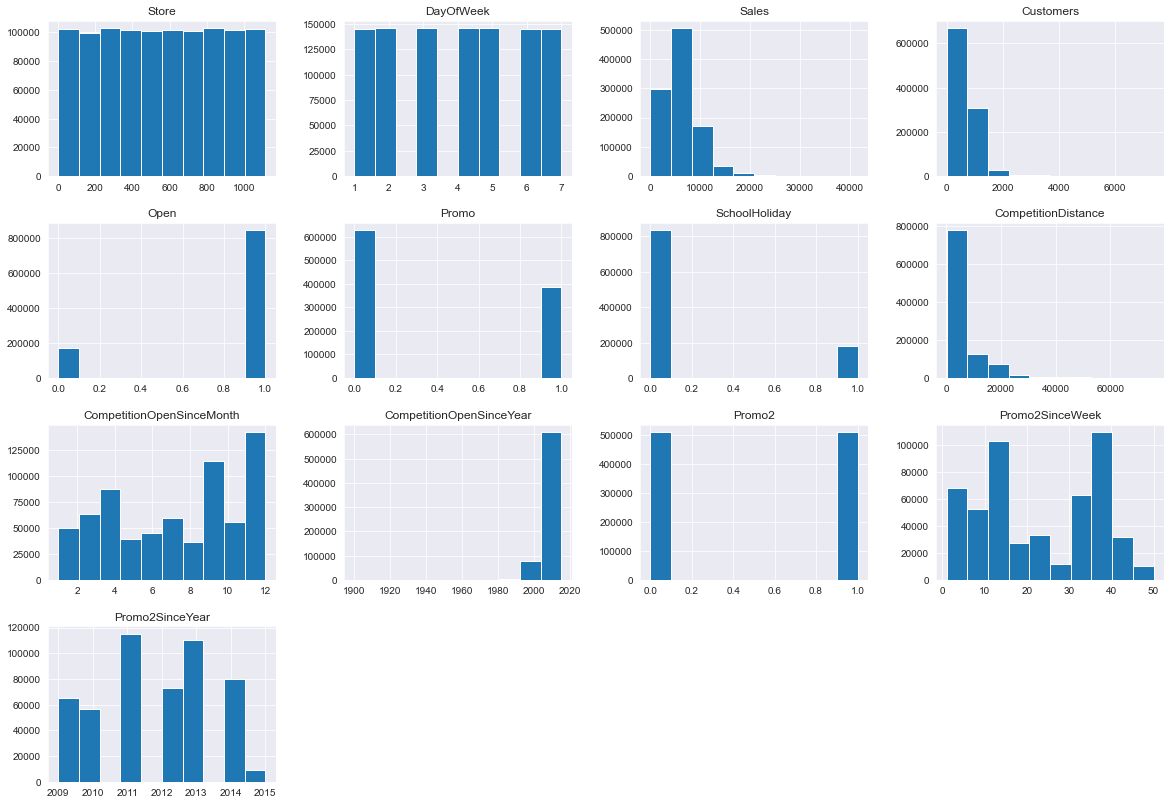

In [78]:
# Displaying Numeric Features of train datset in the form of histogram
numeric_features=list(train_df.select_dtypes(include=['int64','float64','int32']).columns)
train_df[numeric_features].hist(figsize=(20,14))

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>],
       [<AxesSubplot:title={'center':'Promo2SinceWeek'}>,
        <AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>]],
      dtype=object)

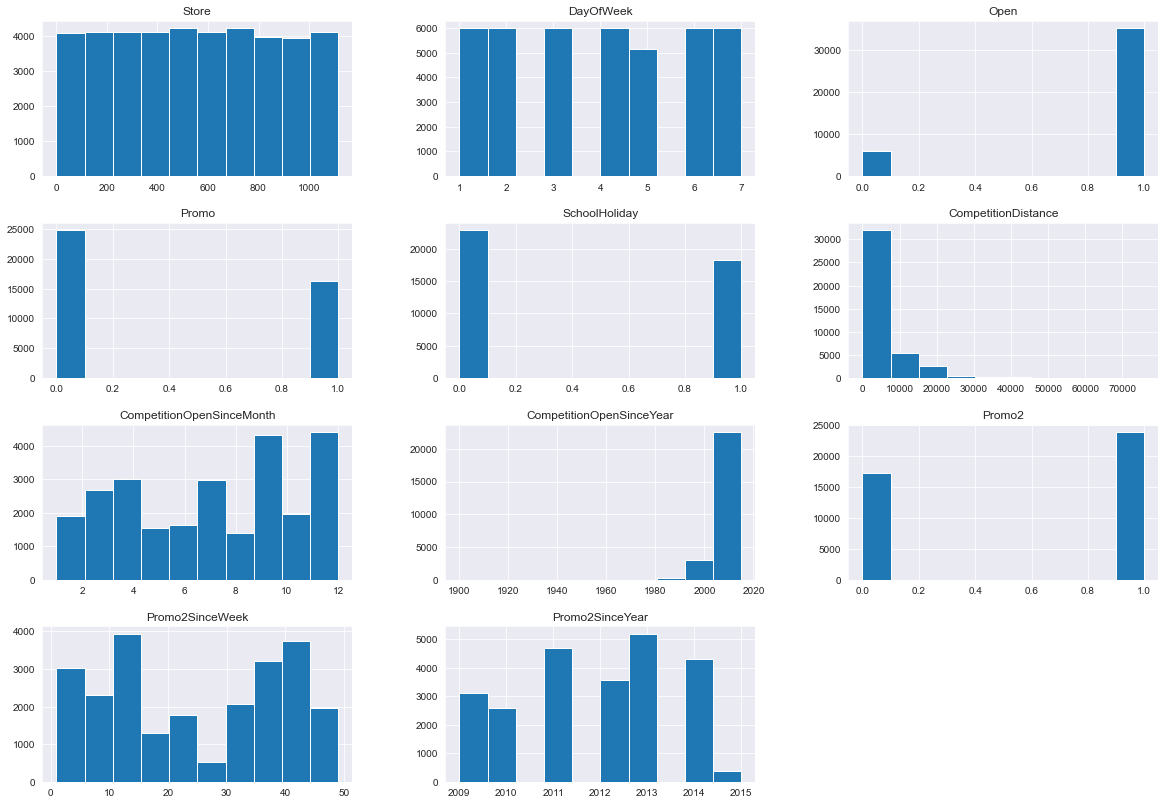

In [79]:
# Displaying Numeric Features of train datset in the form of histogram
numeric_features=list(test_df.select_dtypes(include=['int64','float64','int32']).columns)
test_df[numeric_features].hist(figsize=(20,14))

Based on the above hsitogram both on test and training datasets the columns are proportional.
However shcool holiday feature are not i.e test data has more school holday than training data.



In [148]:
test_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Task 1 - Exploration of customer purchasing behavior
   * Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

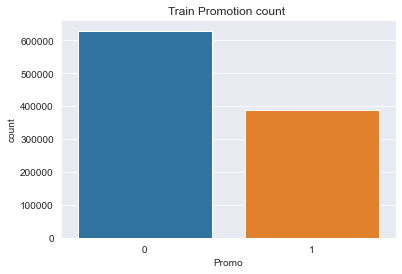

In [184]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
ax=sns.countplot(pd.concat([train_df], sort=False)['Promo'], label = "Count")
#ax=sns.countplot(pd.concat([test_df], sort=False)['Promo'], label = "Count")

plt.title('Train Promotion count ')
#plt.title('Test Promotion count ')
#plt.xlabel('promo')
plt.ylabel('count')
plt.show()

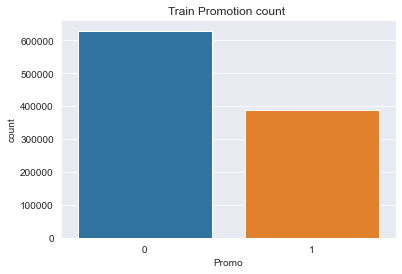

In [185]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
ax=sns.countplot(pd.concat([train_df], sort=False)['Promo'], label = "Count")
#ax=sns.countplot(pd.concat([test_df], sort=False)['Promo'], label = "Count")

plt.title('Train Promotion count ')
#plt.title('Test Promotion count ')
#plt.xlabel('promo')
plt.ylabel('count')
plt.show()

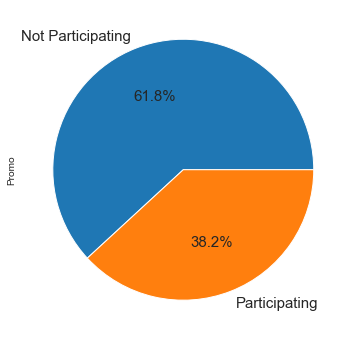

In [99]:
fig = plt.figure(figsize=(10,6))
ax = (train_df['Promo'].value_counts()*100.0 /len(train_df))\
.plot.pie(autopct='%.1f%%', labels = ['Not Participating', 'Participating'],
         fontsize=15) 

<AxesSubplot:>

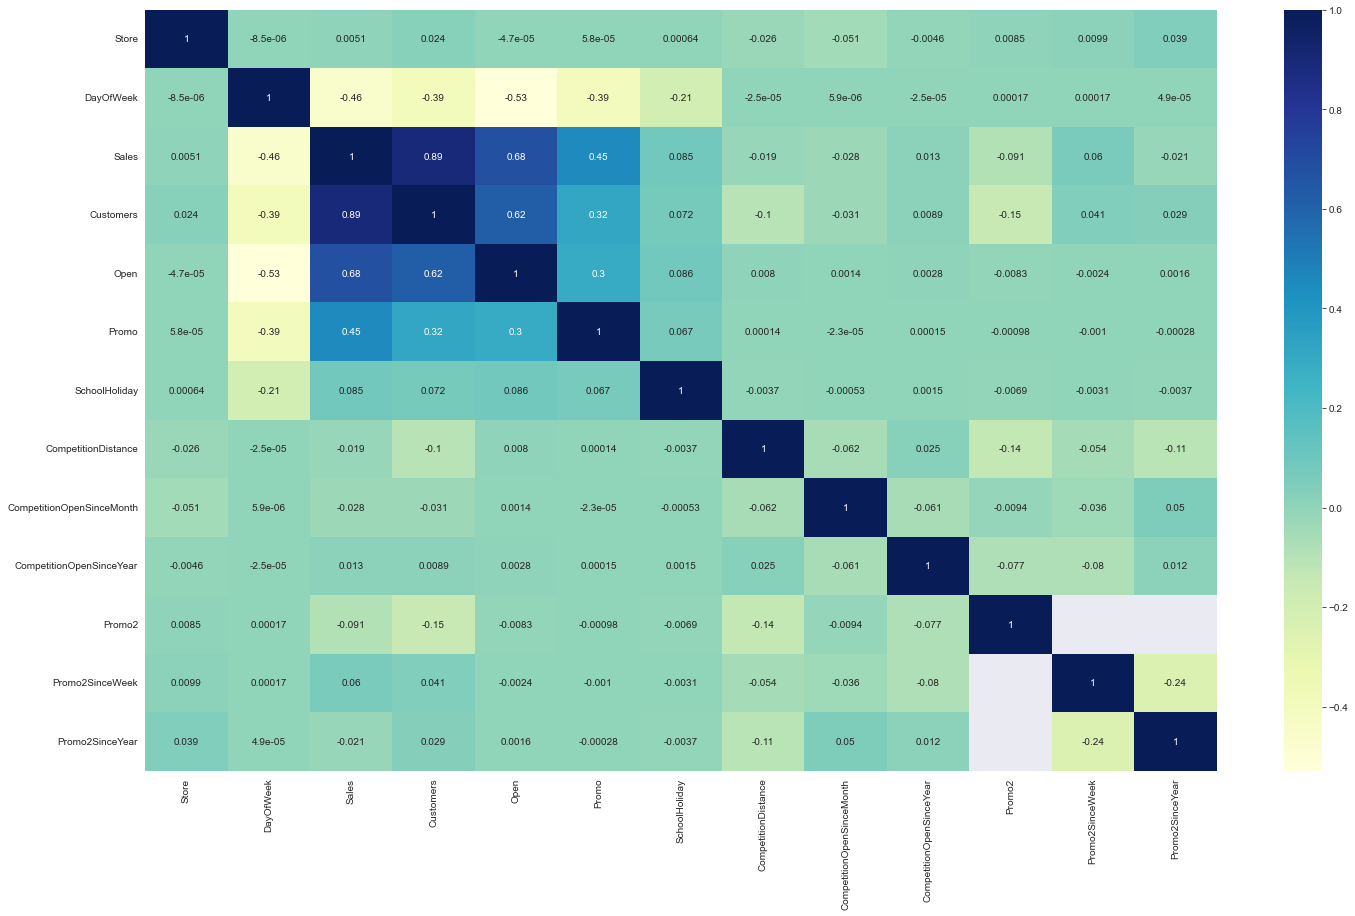

In [114]:
#Heatmap/graphical represetnation of features after preprocessed/correleation b/n features
plt.figure(figsize=(24,14))
sns.heatmap(train_df.corr(), annot=True, cmap='YlGnBu')

In [113]:
import matplotlib.pyplot as plt
plot.heatmap(test_df[['Sales', 'Customers']], title='Correlation Between Sales and Customers')

AttributeError: 'function' object has no attribute 'heatmap'

In [115]:
from matplotlib.pyplot import *